In [3]:
# ノック1
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/s1ok69oo/causal_inference_100knock/main/data/causal_knock1.csv')
df.head()

,y,x,t,y_t1,y_t0
0,10,12,0,15,10
1,16,15,1,16,11
2,15,21,0,20,15
3,4,0,1,4,0
4,7,3,1,7,2


変数名	データの概要	備考

y	今季の受注件数	観測される

x	前季の受注件数	観測される

t	分析レポートが提供されたかどうかを表すダミー変数	1: 提供された, 0:　提供されなかった

y_t1	分析レポートが提供された場合の今季の受注件数	潜在的結果変数

y_t0	分析レポートが提供されなかった場合の今季の受注件数	潜在的結果変数

In [5]:
(df.y - df.x).mean()

-0.8

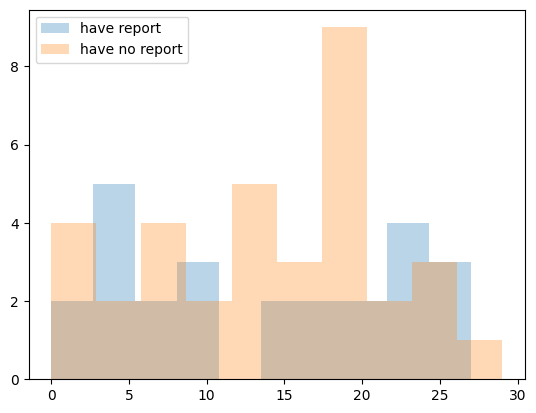

In [10]:
# ノック8
import matplotlib.pyplot as plt
%matplotlib inline
df_t1 = df[df['t']==1]
plt.hist(df_t1['x'], alpha=0.3, label='have report')
df_t0 = df[df['t']==0]
plt.hist(df_t0['x'], alpha=0.3, label='have no report')
plt.legend()
plt.show()

In [11]:
# ATEの推定
# ノック9
df_t1 = df[df['t']==1]
df_t0 = df[df['t']==0]

df_t1['y'].mean() - df_t0['y'].mean()

4.434285714285714

In [12]:
from scipy import stats

t, p = stats.ttest_ind(df_t1['y'], df_t0['y'], alternative='greater')
print(f"p値: {p}")

p値: 0.007380686135298631


### 2章

In [13]:
df_rct = pd.read_csv('https://raw.githubusercontent.com/s1ok69oo/causal_inference_100knock/main/data/causal_knock2_rct.csv')

df_reg = pd.read_csv('https://raw.githubusercontent.com/s1ok69oo/causal_inference_100knock/main/data/causal_knock2_reg.csv')

In [15]:
df_rct.head()

,y,t,x0,x1,x2,x3
0,3500,1,4,14500,0,1
1,1000,0,5,7500,0,1
2,1500,1,0,3000,1,0
3,2500,1,3,9000,0,1
4,0,0,3,4000,1,0


In [16]:
df_reg.head()

,y,t,x0,x1,x2,x3
0,2500,1.0,4,9500,0,1
1,2000,0.0,5,9000,1,0
2,2000,0.0,0,7500,1,0
3,3000,0.0,3,10000,1,0
4,500,1.0,3,5500,0,1


In [17]:
df = df_reg.drop('x3', axis=1)

In [18]:
import statsmodels.api as sm

# 共変量
X = df[['t', 'x0', 'x1', 'x2']]
X = sm.add_constant(X)

# 被説明変数
y = df['y']

# 結果を出力
res = sm.OLS(y, X).fit()
print(res.summary())

ModuleNotFoundError: No module named 'statsmodels'

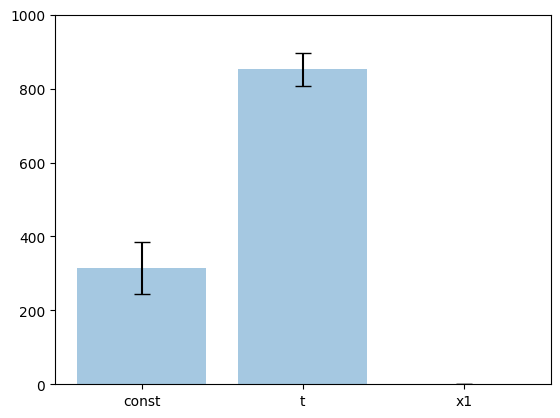

In [19]:
# ノック20
import statsmodels.api as sm

# 共変量
X = df[['t', 'x1']]
X = sm.add_constant(X)

# 被説明変数
y = df['y']

# 結果を出力
res = sm.OLS(y, X).fit()

# 可視化
cols = X.columns
plt.bar(x=cols, height=res.params, yerr=res.bse, capsize=6, alpha=0.4)
plt.ylim(0, 1000)
plt.show()

In [21]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     184.4
Date:                Mon, 17 Apr 2023   Prob (F-statistic):           3.18e-74
Time:                        22:55:04   Log-Likelihood:                -16509.
No. Observations:                2000   AIC:                         3.302e+04
Df Residuals:                    1997   BIC:                         3.304e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        314.2865     69.931      4.494      0.000     177.140     451.433
t            851.8932     44.412     19.182      0.000     764.795     938.991
x1             0.0562      0.008      7.302      0.000       0.041       0.071
==============================================================================
Omnibus:                      123.422   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.751
Skew:                           0.568   Prob(JB):                     8.14e-28
Kurtosis:                       2.544   Cond. No.                     2.89e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.89e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 3章


In [ ]:


df = pd.read_csv('https://raw.githubusercontent.com/s1ok69oo/causal_inference_100knock/main/data/causal_knock3.csv', index_col=0)